# AJ Ecom Pvt Ltd is one of the leading business who have supermarkets across different regions of India. They want to understand the performance of their supermarket in terms of customers, products and its sale.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
customer = pd.read_csv('Customer.csv')
print(customer.shape)
customer.head(1)

(5647, 4)


,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0


In [4]:
product = pd.read_csv('prod_cat_info.csv')
print(product.shape)
product.head(1)

(23, 4)


,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens


In [5]:
transaction = pd.read_csv('Transactions.csv')
print(transaction.shape)
transaction.head(1)

(23053, 10)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop


In [6]:
cust_transaction = pd.merge(customer, transaction, left_on = 'customer_Id', right_on = 'cust_id' )
cust_transaction.shape

(23053, 14)

In [7]:
cust_transaction.drop('cust_id', axis=1, inplace = True)

In [8]:
cust_transaction.sample(5)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
5199,274692,19-04-1975,M,3.0,69176208532,14-03-2013,6,5,5,1215,637.875,6712.875,MBR
13361,269659,18-04-1983,F,8.0,4623545525,16-11-2013,9,3,-5,-164,86.100,-906.100,MBR
18414,271244,02-06-1988,F,3.0,93943110737,1/5/2013,4,3,4,1402,588.840,6196.840,Flagship store
18782,270481,11-10-1988,M,7.0,10875963158,30-11-2012,4,2,2,1096,230.160,2422.160,TeleShop
7847,274269,09-11-1977,M,8.0,76436093371,30-06-2011,1,4,2,939,197.190,2075.190,TeleShop


In [9]:
market_data = pd.merge(product, cust_transaction, left_on = ['prod_cat_code', 'prod_sub_cat_code'], right_on = ['prod_cat_code','prod_subcat_code'] )
market_data.shape

(23053, 16)

In [10]:
market_data.head(5)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type
0,1,Clothing,4,Mens,275152,16-01-1970,M,4.0,77756237112,10/9/2013,4,5,308,161.700,1701.700,e-Shop
1,1,Clothing,4,Mens,268732,06-05-1970,M,2.0,36887501268,25-02-2011,4,4,1150,483.000,5083.000,MBR
2,1,Clothing,4,Mens,271045,23-05-1970,F,7.0,57872808744,24-07-2011,4,1,359,37.695,396.695,TeleShop
3,1,Clothing,4,Mens,268627,01-06-1970,M,9.0,46129128420,2/1/2014,4,3,515,162.225,1707.225,e-Shop
4,1,Clothing,4,Mens,270430,01-06-1970,M,7.0,16839672501,29-01-2013,4,2,1282,269.220,2833.220,Flagship store


In [11]:
market_data.drop('prod_sub_cat_code', axis=1, inplace = True)

In [12]:
print(market_data.shape)
market_data.columns

(23053, 15)


Index(['prod_cat_code', 'prod_cat', 'prod_subcat', 'customer_Id', 'DOB',
       'Gender', 'city_code', 'transaction_id', 'tran_date',
       'prod_subcat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

In [13]:
market_data = market_data[market_data.columns[[3,0,1,2,4,5,6,7,8,9,10,11,12,13,14]]]

In [14]:
market_data.isnull().sum()

customer_Id         0
prod_cat_code       0
prod_cat            0
prod_subcat         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
tran_date           0
prod_subcat_code    0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [15]:
market_data.dropna(inplace = True)

<AxesSubplot:>

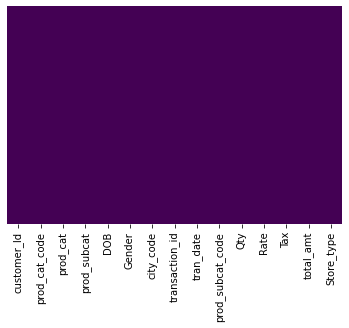

In [16]:
sns.heatmap(market_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
# i have merged all the dataset to one DataFrame called market_data so now i can perform the next task

# Data Analysis

In [18]:
market_data.sample(5)

,customer_Id,prod_cat_code,prod_cat,prod_subcat,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type
19322,270151,6,Home and kitchen,Furnishing,05-06-1979,M,10.0,84228260271,9/7/2012,2,4,1108,465.360,4897.360,MBR
7637,271607,3,Electronics,Computers,07-04-1986,M,6.0,91978694387,9/2/2012,5,3,1391,438.165,4611.165,Flagship store
2353,269407,1,Clothing,Kids,25-04-1978,F,1.0,82033355208,15-08-2012,3,2,1075,225.750,2375.750,e-Shop
7429,267285,3,Electronics,Computers,19-12-1980,M,10.0,66059466135,8/2/2013,5,2,119,24.990,262.990,e-Shop
8481,272031,3,Electronics,Personal Appliances,13-04-1982,F,1.0,8047741347,13-12-2012,8,-1,-575,60.375,-635.375,Flagship store


<AxesSubplot:xlabel='total_amt'>

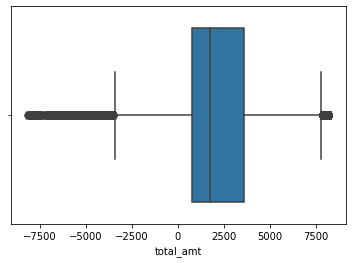

In [19]:
sns.boxplot(market_data['total_amt'])

In [20]:
market_data = market_data[market_data['total_amt']>0]
market_data.shape

(20860, 15)

<AxesSubplot:xlabel='total_amt'>

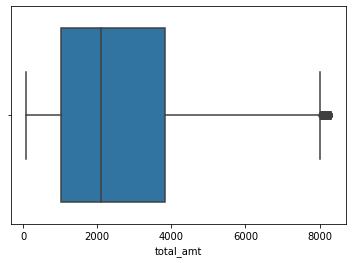

In [21]:
sns.boxplot(market_data['total_amt'])

### In the above boxplot noticed that there are outliers, using percentile removed those outliers 

In [22]:
quantile1, quantile3= np.percentile(market_data['total_amt'],[25,75])
quantile1, quantile3

(1030.965, 3825.51)

In [23]:
iqr_value=quantile3-quantile1
print(iqr_value)

2794.545


In [24]:
lower_bound_val = quantile1 -(1.4 * iqr_value) 
upper_bound_val = quantile3 +(1.4 * iqr_value)
print(lower_bound_val,upper_bound_val)

-2881.398 7737.873


In [25]:
market_data = market_data[(market_data.total_amt>lower_bound_val) & (market_data.total_amt<upper_bound_val)]
market_data.shape

(20551, 15)

### In the below boxplot we can see that there is no any outlier

<AxesSubplot:xlabel='total_amt'>

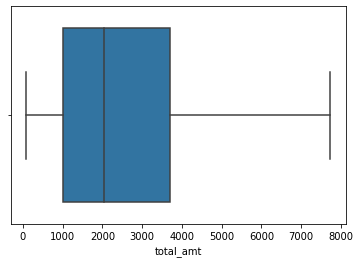

In [26]:
sns.boxplot(market_data['total_amt'])

In [27]:
market_data.head()

,customer_Id,prod_cat_code,prod_cat,prod_subcat,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type
0,275152,1,Clothing,Mens,16-01-1970,M,4.0,77756237112,10/9/2013,4,5,308,161.700,1701.700,e-Shop
1,268732,1,Clothing,Mens,06-05-1970,M,2.0,36887501268,25-02-2011,4,4,1150,483.000,5083.000,MBR
2,271045,1,Clothing,Mens,23-05-1970,F,7.0,57872808744,24-07-2011,4,1,359,37.695,396.695,TeleShop
3,268627,1,Clothing,Mens,01-06-1970,M,9.0,46129128420,2/1/2014,4,3,515,162.225,1707.225,e-Shop
4,270430,1,Clothing,Mens,01-06-1970,M,7.0,16839672501,29-01-2013,4,2,1282,269.220,2833.220,Flagship store


In [28]:
market_data['city_code'].value_counts()

3.0     2165
4.0     2159
5.0     2107
7.0     2097
10.0    2080
8.0     2062
1.0     2028
2.0     2010
9.0     1944
6.0     1899
Name: city_code, dtype: int64

In [29]:
market_data['Store_type'].value_counts()

e-Shop            8291
MBR               4142
Flagship store    4088
TeleShop          4030
Name: Store_type, dtype: int64

### product category vise sale

<AxesSubplot:xlabel='prod_cat', ylabel='total_amt'>

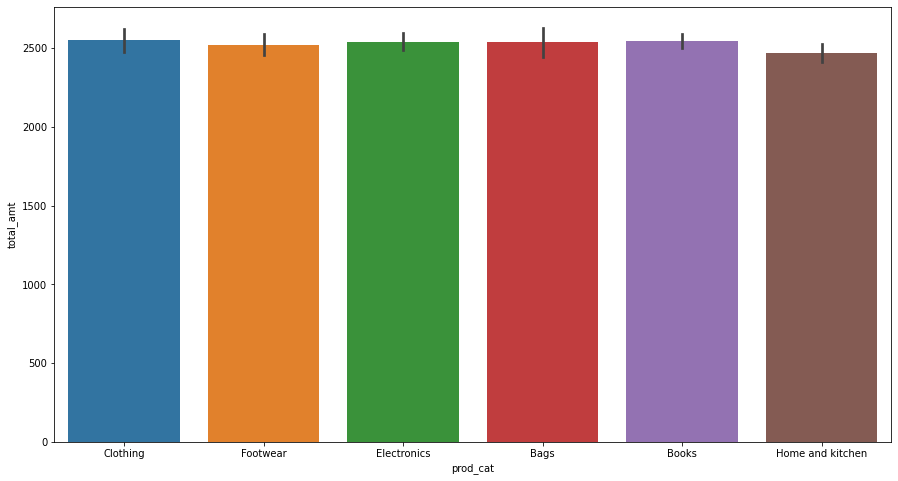

In [71]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.barplot(x='prod_cat', y='total_amt', data = market_data)

### which type product Male/Female buy most

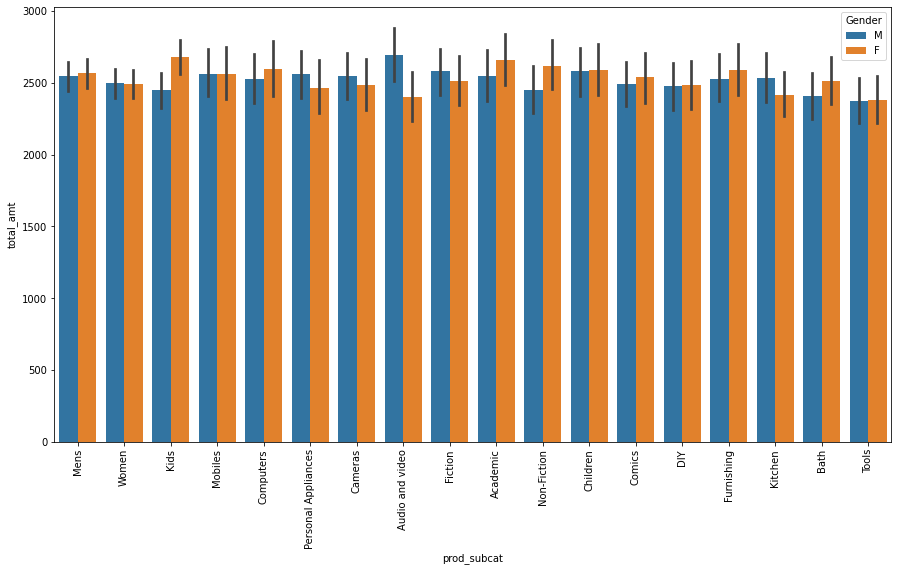

In [31]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.barplot(x='prod_subcat', y='total_amt',hue = 'Gender', data = market_data)
rotation = plt.xticks(rotation = 90)

 ### from which sources products ordered / ordered most and there total amount

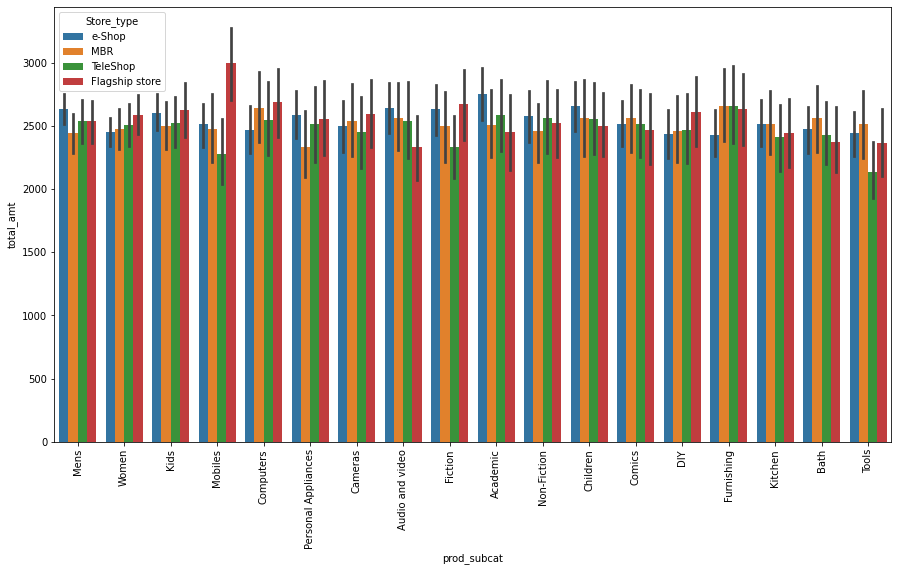

In [32]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.barplot(x='prod_subcat', y='total_amt',hue = 'Store_type', data = market_data)
rotation = plt.xticks(rotation = 90)

### which products with store type have more tax 

<AxesSubplot:xlabel='prod_cat', ylabel='Tax'>

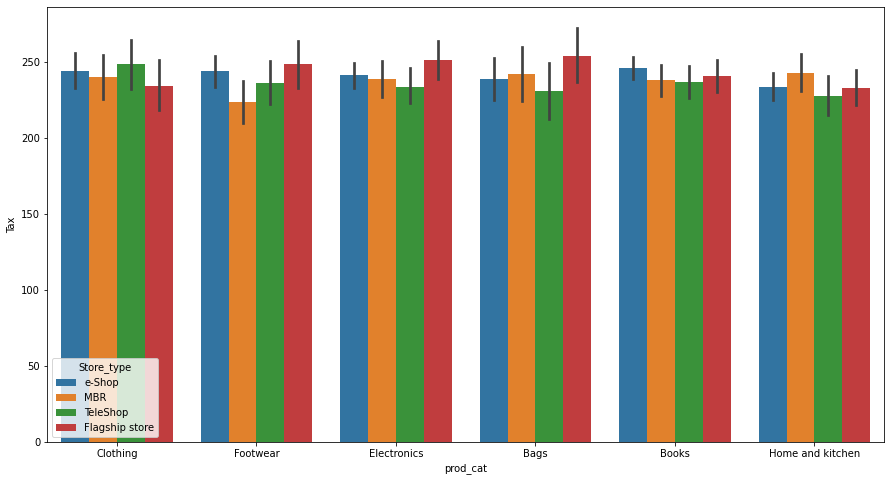

In [80]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.barplot(x='prod_cat', y='Tax', hue = 'Store_type', data = market_data)

### Which products have sold most 

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.barplot(x='prod_subcat', y='total_amt', data = market_data)
rotation = plt.xticks(rotation = 90)

###  Tax is depend on the Rate of products sold

<AxesSubplot:xlabel='Tax', ylabel='Rate'>

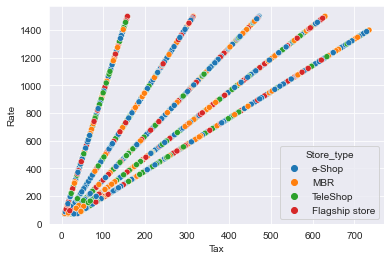

In [90]:
# this will take sometime to plot
sns.set_style("darkgrid")
sns.scatterplot(x = 'Tax', y = 'Rate', hue= 'Store_type', data = market_data)

### who are buying the products most (Male/Female)

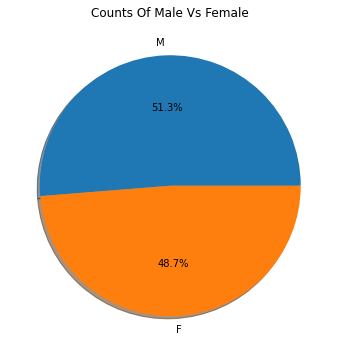

In [35]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
counts = market_data.Gender.value_counts()
plt.pie(counts, autopct='%1.1f%%',
        labels=counts.index, shadow=True)
plt.title('Counts Of Male Vs Female')
plt.show()

### who have purchased in more amount (Male/Female)

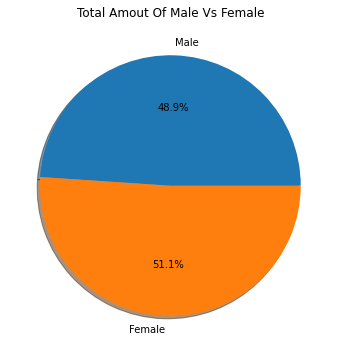

In [36]:
group_gender = market_data.groupby('Gender').sum()['total_amt']
 
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.pie(group_gender, autopct='%1.1f%%',
        labels=['Male','Female'], shadow=True)
plt.title('Total Amout Of Male Vs Female')
plt.show()

### who have purchased the more products and what was the medium of buying (store type)

In [51]:
gender_store_type = market_data[['Gender','Store_type','total_amt']]
gender_store_type_group = gender_store_type.groupby(['Gender','Store_type'],as_index=False).sum().round()
gender_store_type_group_pivot = gender_store_type_group.pivot(index='Store_type',columns='Gender')
gender_store_type_group_pivot

total_amt            
Gender                   F           M
Store_type                            
Flagship store   5107825.0   5357743.0
MBR              5143220.0   5228449.0
TeleShop         4825801.0   5171083.0
e-Shop          10340050.0  10766552.0

Text(0.5, 1.0, '\nTotal Amount by Gender and Store Type\n')

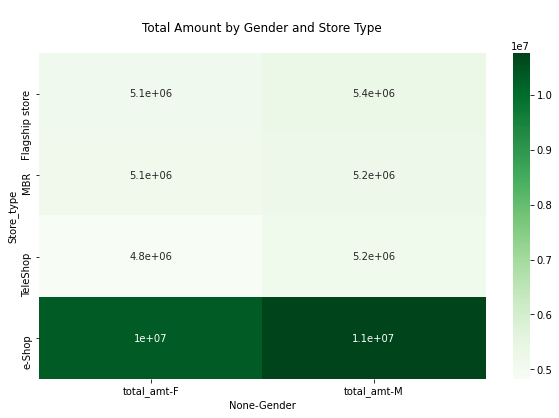

In [49]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.heatmap(gender_store_type_group_pivot, annot = True, cmap='Greens')
plt.title('\nTotal Amount by Gender and Store Type\n')

### which city have purchased the more products and what was the medium of buying (store type)

In [52]:
city_store = market_data[['Store_type','city_code','total_amt']]
city_store_group = city_store.groupby(['Store_type','city_code'],as_index=False).sum().round()
city_store_group_pivot = city_store_group.pivot(index='city_code',columns='Store_type')
city_store_group_pivot

total_amt                                 
Store_type Flagship store        MBR   TeleShop     e-Shop
city_code                                                 
1.0              999463.0  1088687.0   961026.0  2004992.0
2.0             1044573.0   954355.0  1021956.0  2165183.0
3.0             1201607.0  1086791.0  1017385.0  2170931.0
4.0              996017.0  1065931.0  1126949.0  2197165.0
5.0             1024096.0  1055967.0   983283.0  2184099.0
6.0              912494.0  1025948.0   844858.0  1890105.0
7.0             1102541.0  1034367.0  1009192.0  2168459.0
8.0             1012370.0  1045738.0  1021521.0  2156252.0
9.0             1054761.0   933208.0   924808.0  2084261.0
10.0            1117646.0  1080678.0  1085908.0  2085156.0

Text(0.5, 1.0, '\nTotal Amount by City Code and Store Type\n')

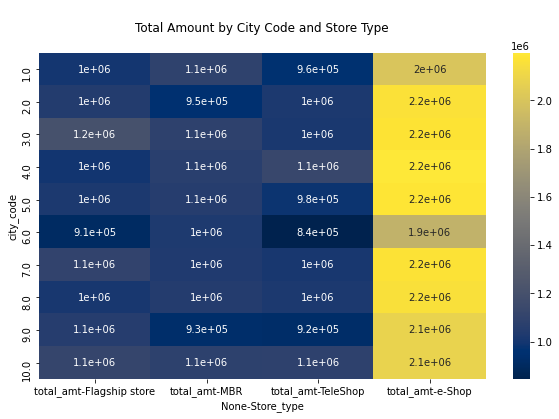

In [40]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.heatmap(city_store_group_pivot, annot = True, cmap = 'cividis')
plt.title('\nTotal Amount by City Code and Store Type\n')

In [41]:
market_data['prod_cat'].value_counts()

Books               5404
Electronics         4400
Home and kitchen    3678
Footwear            2679
Clothing            2629
Bags                1761
Name: prod_cat, dtype: int64

### which category products has sold more and  what were the medium of buying (store type)

In [55]:
product_store = market_data[['prod_cat','Store_type','total_amt']]
product_store_group = product_store.groupby(['prod_cat','Store_type'],as_index=False).sum().round()
product_store_group_pivot = product_store_group.pivot(index='prod_cat',columns='Store_type')
product_store_group_pivot

total_amt                                 
Store_type       Flagship store        MBR   TeleShop     e-Shop
prod_cat                                                        
Bags                   936641.0   927347.0   868664.0  1734417.0
Books                 2771785.0  2700877.0  2640372.0  5641584.0
Clothing              1259655.0  1394542.0  1354331.0  2703610.0
Electronics           2351021.0  2162778.0  2100904.0  4569386.0
Footwear              1354738.0  1249721.0  1331924.0  2811147.0
Home and kitchen      1791728.0  1936404.0  1700689.0  3646458.0

Text(0.5, 1.0, '\nTotal Amount by Product Category and Store Type\n')

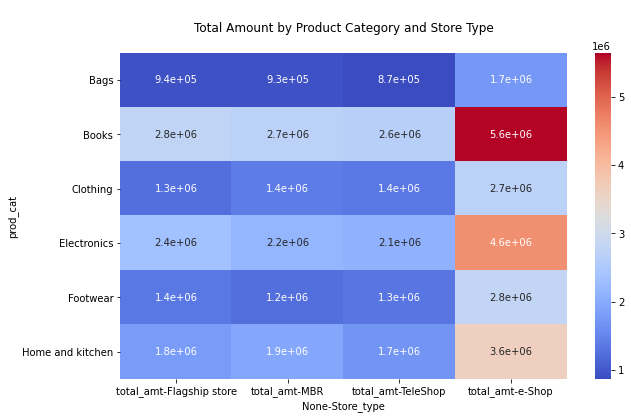

In [56]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.heatmap(product_store_group_pivot, annot = True, cmap='coolwarm')
plt.title('\nTotal Amount by Product Category and Store Type\n')

### who have purchased the more products and those were from which city and what was the medium of buying (store type)

In [57]:
city_gender = market_data[['Gender','city_code','total_amt']]
city_gender_group = city_gender.groupby(['Gender','city_code'],as_index=False).sum().round()
city_gender_group_pivot = city_gender_group.pivot(index='city_code',columns='Gender')
city_gender_group_pivot

total_amt           
Gender             F          M
city_code                      
1.0        2608267.0  2445900.0
2.0        2369600.0  2816468.0
3.0        2508459.0  2968253.0
4.0        2529220.0  2856842.0
5.0        2584217.0  2663228.0
6.0        2387431.0  2285973.0
7.0        2934721.0  2379838.0
8.0        2067999.0  3167881.0
9.0        2611165.0  2385873.0
10.0       2815817.0  2553570.0

Text(0.5, 1.0, '\nTotal Amount by city Code and Gender\n')

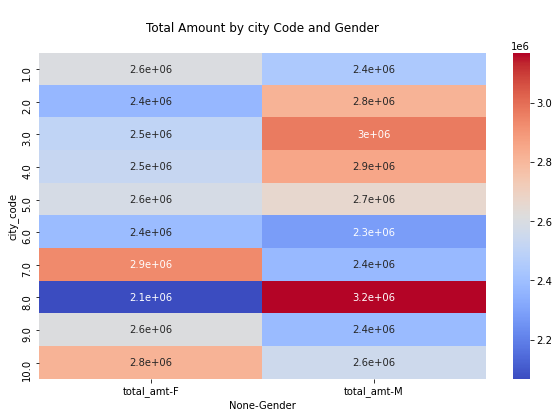

In [58]:
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.heatmap(city_gender_group_pivot, annot = True, cmap='coolwarm')
plt.title('\nTotal Amount by city Code and Gender\n')